### Caso:
En una entidad bancaria existen varios canales de comunicación tales como: ATM, Oficinas, IVR, Banca por internet-Móvil, etc.
Sin embargo, al realizar las comunicaciones de ofertas a los clientes de dicha entidad bancaria, el cliente recibe diversas ofertas de distintos canales sin saber si les da importancia o no, por lo que ya interviene un gasto por parte de la entidad, ya que, realiza alianzas estratégicas de campaña.


# [Modelo] Segmentación K-Means

Por tanto: Se requiere identificar cuál sería el medio de comunicación preferido para los clientes y así enviarles ofertas, advertencia, recordatorios, etc. más direccionadas.

### 1. Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.style.use('ggplot')

### 2. Extracción Base de datos

In [2]:
dataFrame = pd.read_csv("01dataBaseMulti.txt",delimiter='|')
dataFrame.head()

,cliente,edad,ingreso,sexo,flgLimaprov,trxAplus,trxAtm,trxBcaex,trxBm,trxBxi,trxIvr,trxPostc,trxPostd,trxSalex,trxSbt,trxVent,trx
0,28,[7. > 55],[1. <=700],M,1,0.0,10.0,0.0,43.0,5.0,0.0,0.0,1.0,29.0,1.0,2.0,91
1,44,[7. > 55],[8. > 8000],M,1,0.0,125.0,0.0,0.0,1679.0,0.0,76.0,21.0,0.0,11.0,6.0,1918
2,63,[7. > 55],[3. <=2500],F,1,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,26
3,70,[7. > 55],[8. > 8000],M,1,0.0,359.0,18.0,0.0,0.0,0.0,0.0,175.0,17.0,8.0,32.0,609
4,77,[7. > 55],[4. <=3500],M,1,0.0,8.0,0.0,0.0,23.0,7.0,111.0,0.0,2.0,7.0,12.0,170


In [3]:
print("Número de filas: " + str(dataFrame.shape[0]))
print("Número de columnas: " + str(dataFrame.shape[1]))

Número de filas: 40000
Número de columnas: 17


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      40000 non-null  int64  
 1   edad         39875 non-null  object 
 2   ingreso      37020 non-null  object 
 3   sexo         39999 non-null  object 
 4   flgLimaprov  40000 non-null  int64  
 5   trxAplus     40000 non-null  float64
 6   trxAtm       40000 non-null  float64
 7   trxBcaex     40000 non-null  float64
 8   trxBm        40000 non-null  float64
 9   trxBxi       40000 non-null  float64
 10  trxIvr       40000 non-null  float64
 11  trxPostc     40000 non-null  float64
 12  trxPostd     40000 non-null  float64
 13  trxSalex     40000 non-null  float64
 14  trxSbt       40000 non-null  float64
 15  trxVent      40000 non-null  float64
 16  trx          40000 non-null  int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 5.2+ MB


### 3. Metodología

In [5]:
#### 3.1 Análisis Previo (objetivo)
#### 3.2 Exploración (descriptivo, grafico barras,cajas)
#### 3.3 Transformación (standarización,cajas)
#### 3.4 Outliers (analisis y eliminación de outliers)
#### 3.5 Dimensionamiento (PCA)
#### 3.6 Modelamiento
#### 3.7 Evaluación
#### 3.8 Perfilamiento
#### 3.9 Visualización

In [6]:
# Variables objetivo de estudio:
channelName = ['trxAplus', 'trxBcaex', 'trxSalex', 'trxBm', 'trxBxi', 'trxIvr', 'trxSbt', 'trxVent',
               'trxAtm','trxPostc', 'trxPostd']

#### 3.1 Análisis Negocio

El dataset ya se encuentra trabajado a nivel de cliente con sus respectivas variables, se consideraron filtros de criterios de autoasignados, distribución histórica de transacciones, etc.

#### 3.2 Exploración

In [7]:
dataFrame[channelName].describe()

,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.692650,4.509275,3.303575,227.731450,128.066375,3.956700,3.364375,2.865125,62.573200,5.897150,18.777275
std,6.230518,11.050313,10.898933,802.171156,552.384436,15.673606,6.738015,8.973881,68.091926,33.659851,46.006052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,41.000000,0.000000,2.000000
75%,0.000000,4.000000,2.000000,14.000000,32.000000,2.000000,4.000000,3.000000,88.000000,0.000000,15.000000
max,762.000000,434.000000,523.000000,21210.000000,65309.000000,772.000000,162.000000,884.000000,1296.000000,1339.000000,951.000000


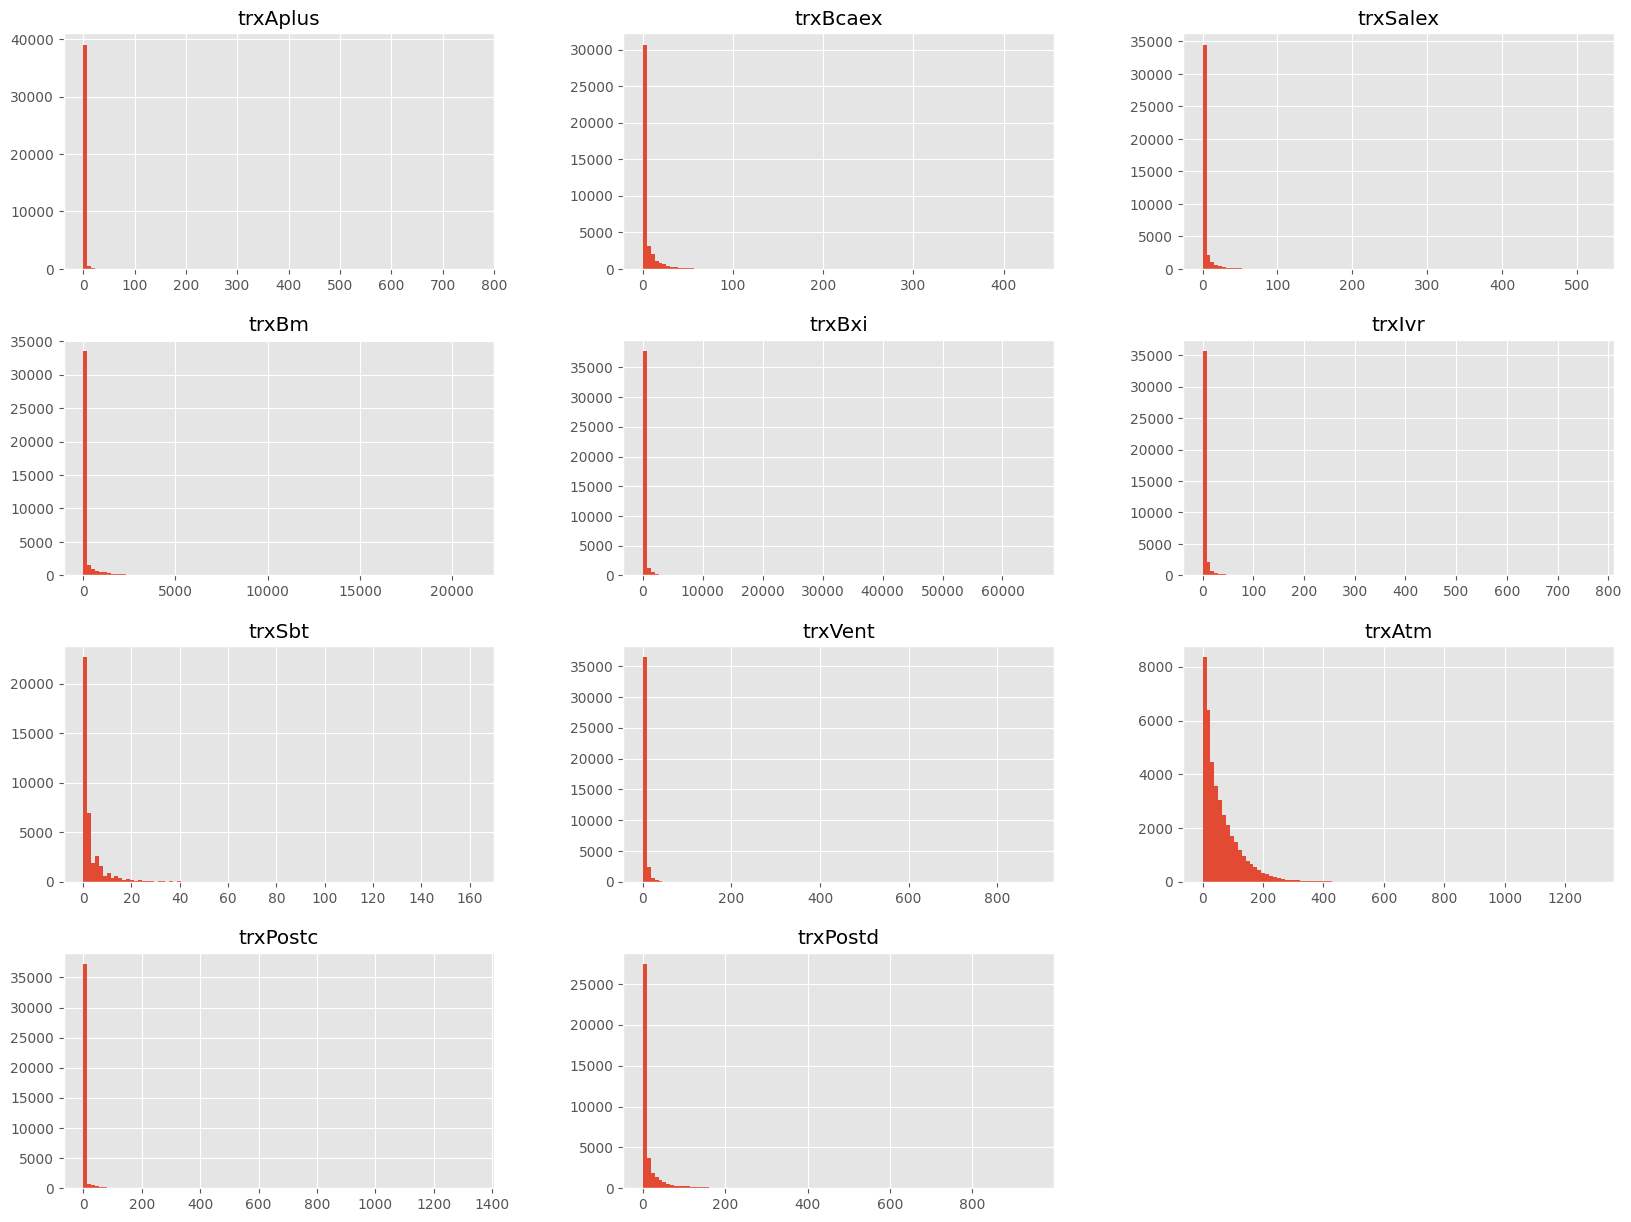

In [8]:
dataFrame[channelName].hist(bins = 100, figsize=(20,15))
plt.show()

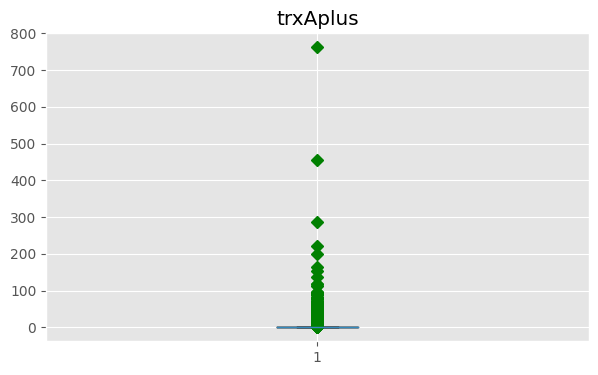

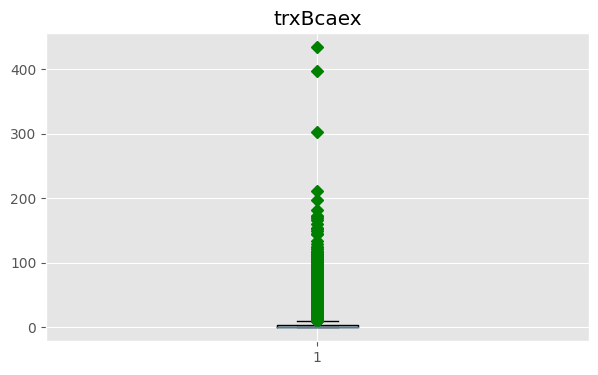

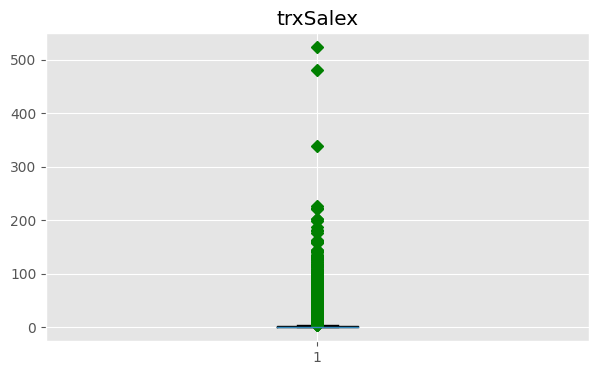

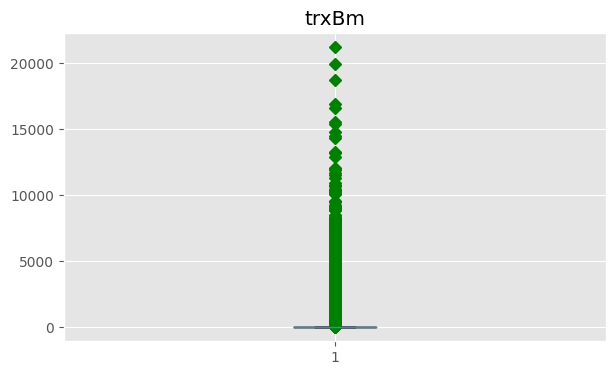

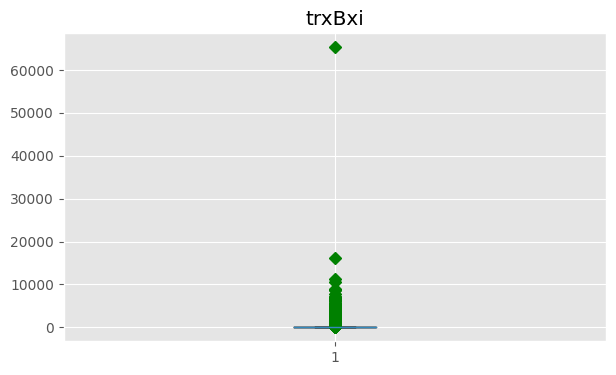

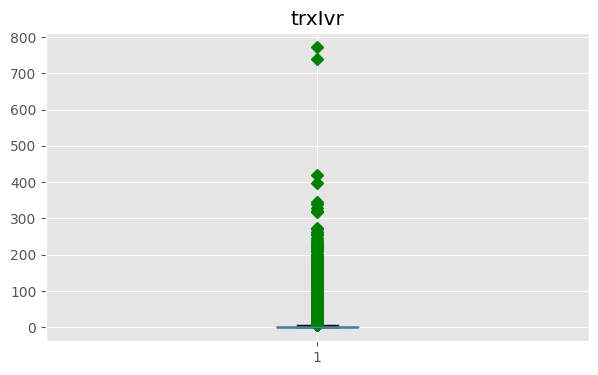

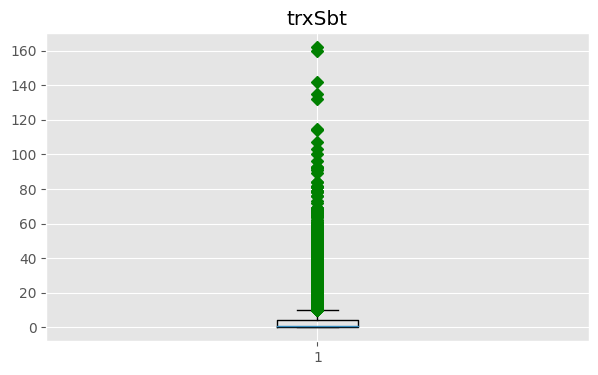

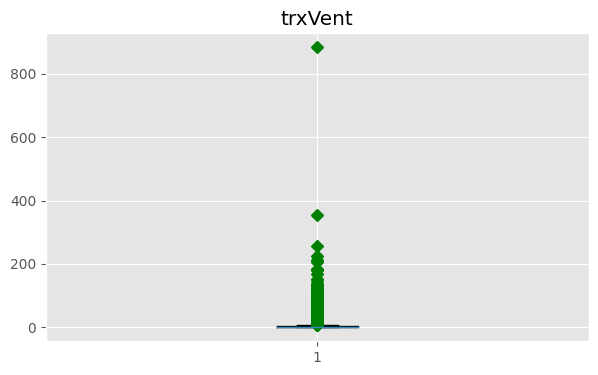

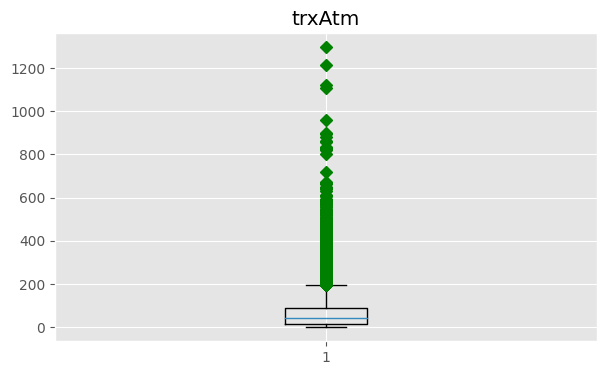

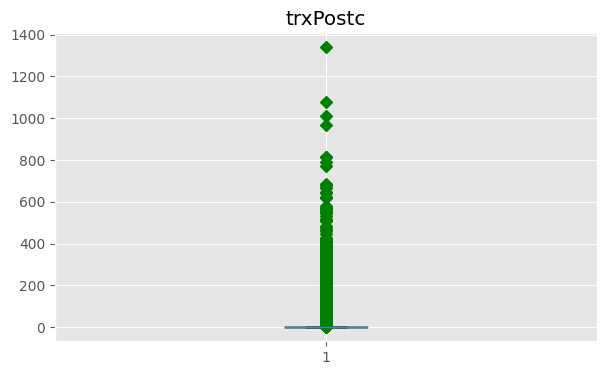

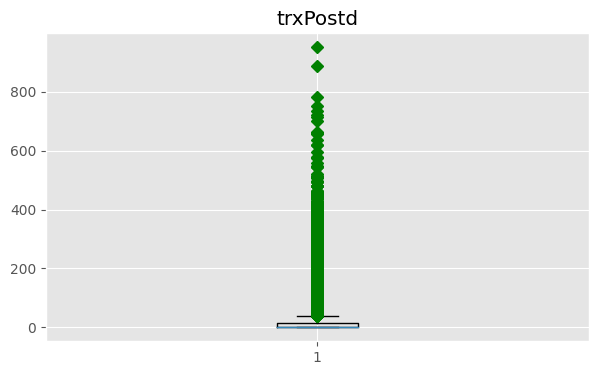

In [9]:
# Gráfico de cajas por variable en estudio:
for columnName in channelName:
    plt.title(columnName)
    plt.boxplot(dataFrame[columnName], 0, 'gD')
    plt.show()

#### 3.3 Transformación

In [10]:
# ------------------------------
# Creamos el objeto para escalar
# ------------------------------
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()

# ************
# Lo aplicamos
# ************
for columnName in channelName:
    dataFrame[columnName] = scaler.fit_transform(dataFrame[columnName].values.reshape(-1, 1))

In [11]:
dataFrame[channelName].head()

,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
0,0.0,0.000000,0.055449,0.002027,0.000077,0.000000,0.006173,0.002262,0.007716,0.000000,0.001052
1,0.0,0.000000,0.000000,0.000000,0.025709,0.000000,0.067901,0.006787,0.096451,0.056759,0.022082
2,0.0,0.000000,0.003824,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000
3,0.0,0.041475,0.032505,0.000000,0.000000,0.000000,0.049383,0.036199,0.277006,0.000000,0.184017
4,0.0,0.000000,0.003824,0.000000,0.000352,0.009067,0.043210,0.013575,0.006173,0.082898,0.000000


#### 3.4 Outliers

In [12]:
# Cálculo de intervalo del diagrama de cajas - Método de Rango Intercuartílico
#def calculateNumOutliars(serie):
#  Q01 = serie.quantile(0.25)
#  Q03 = serie.quantile(0.75)
#  IQR = Q03 - Q01
#  a = (serie < (Q01 - 1.5 * IQR)) | (serie > (Q03 + 1.5 * IQR))
#  numOutliars = a[a == True].shape[0]
#  return numOutliars

In [13]:
# Usamos el método de Z-score (considerando se distribuye Normalmente) --- para grandes volúmenes de datos
def calculateNumOutliars(serie):
    mu = serie.mean()
    desv = np.std(serie)
    a = ((serie-mu)/desv < -2) | ((serie-mu)/desv > 2)
    numOutliars = a[a == True].shape[0]
    return a,numOutliars

In [14]:
numTotal = dataFrame.shape[0]
for columnName in channelName:
    a,numOutliars = calculateNumOutliars(dataFrame[columnName])
    # Creamos nuevos campos para filtrar los Outliers
    dataFrame['flg_'+columnName]=a
    print('*'+columnName)
    if numOutliars > 0:
      print("Número de valores outliars: " + str(numOutliars))
      print("Porcentaje: " + str(np.round(numOutliars * 100 / numTotal, 2)) + "%")
    else:
      print("****No hay Outliers")
    print("\n")

*trxAplus
Número de valores outliars: 486
Porcentaje: 1.22%


*trxBcaex
Número de valores outliars: 1626
Porcentaje: 4.07%


*trxSalex
Número de valores outliars: 1245
Porcentaje: 3.11%


*trxBm
Número de valores outliars: 1438
Porcentaje: 3.6%


*trxBxi
Número de valores outliars: 1078
Porcentaje: 2.7%


*trxIvr
Número de valores outliars: 976
Porcentaje: 2.44%


*trxSbt
Número de valores outliars: 1597
Porcentaje: 3.99%


*trxVent
Número de valores outliars: 879
Porcentaje: 2.2%


*trxAtm
Número de valores outliars: 1734
Porcentaje: 4.34%


*trxPostc
Número de valores outliars: 903
Porcentaje: 2.26%


*trxPostd
Número de valores outliars: 1671
Porcentaje: 4.18%




In [15]:
# ************************
# Extrayendo los Outliers
# ************************
# Luego que cada variable tenga menos del 10% de Outlier, se filtra de manera Multivariada (este filtro podría ser
# considerado como un segmento Heavy)

#[Solución]
dataFrame = dataFrame[(dataFrame['flg_trxAplus']==False)&
                      (dataFrame['flg_trxBcaex']==False)&
                      (dataFrame['flg_trxSalex']==False)&
                      (dataFrame['flg_trxBm']==False)&
                      (dataFrame['flg_trxBxi']==False)&
                      (dataFrame['flg_trxIvr']==False)&
                      (dataFrame['flg_trxSbt']==False)&
                      (dataFrame['flg_trxVent']==False)&
                      (dataFrame['flg_trxAtm']==False)&
                      (dataFrame['flg_trxPostc']==False)&
                      (dataFrame['flg_trxPostd']==False)]

print('Cantidad de Registros sin Outliers: '+str(dataFrame.shape[0]))
dataFrame[channelName].head()

Cantidad de Registros sin Outliers: 30960


,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
2,0.0,0.00000,0.003824,0.0,0.000000,0.000000,0.00000,0.000000,0.018519,0.0,0.0000
6,0.0,0.00000,0.009560,0.0,0.000000,0.001295,0.04321,0.002262,0.006173,0.0,0.0000
7,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.027006,0.0,0.0000
8,0.0,0.02765,0.001912,0.0,0.000383,0.000000,0.00000,0.000000,0.017747,0.0,0.0347
10,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.003394,0.018519,0.0,0.0000


#### 3.6 Modelamiento

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set t

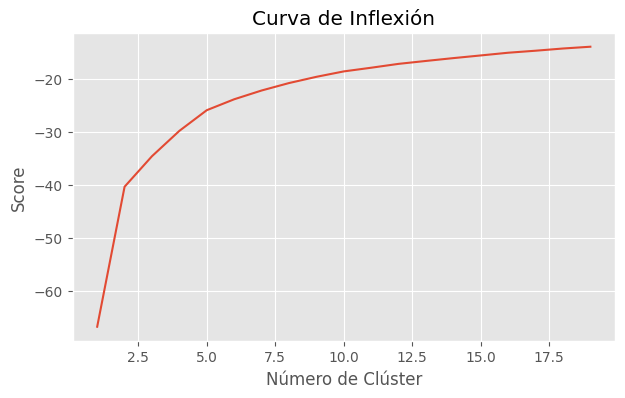

In [17]:
# Calculando el número de clúster adecuado:
X = dataFrame[channelName].copy()

numClus = range(1, 20)
kmeans = [KMeans(n_clusters=i,max_iter=600, algorithm = 'auto') for i in numClus]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(numClus,score)
plt.xlabel('Número de Clúster')
plt.ylabel('Score')
plt.title('Curva de Inflexión')
plt.show()

In [18]:
# Nos fijamos de los indicadores de clustering:

ctdDf = int(0.1*dataFrame.shape[0])
cluster = [kmeans[i].predict(X) for i in range(len(kmeans))]

for i in range(1,11):
    print(str(i+1)+' clústeres:')
    print('Inercia: '+str(kmeans[i].inertia_))
    print('Silueta: '+str(metrics.silhouette_score(X, cluster[i], metric='euclidean',sample_size=ctdDf)))
    print("\n")

2 clústeres:
Inercia: 40.34730696897411
Silueta: 0.45204620854750854


3 clústeres:
Inercia: 34.58980676815027
Silueta: 0.3204122697276078


4 clústeres:
Inercia: 29.805496606609317
Silueta: 0.3487715754036754


5 clústeres:
Inercia: 25.907191220157518
Silueta: 0.3347206952043953


6 clústeres:
Inercia: 23.848742297458244
Silueta: 0.34158092116395555


7 clústeres:
Inercia: 22.19281391001038
Silueta: 0.274437718018809


8 clústeres:
Inercia: 20.78869048238051
Silueta: 0.27234364746145157


9 clústeres:
Inercia: 19.612221734144754
Silueta: 0.2728384194337795


10 clústeres:
Inercia: 18.589663310224687
Silueta: 0.28131041953006564


11 clústeres:
Inercia: 17.894781245096524
Silueta: 0.23131477624705862




Visualizando los grupos en 2-D para tener alguna noción de como se agrupan, en esta ocasión probaremos distintos par de variables

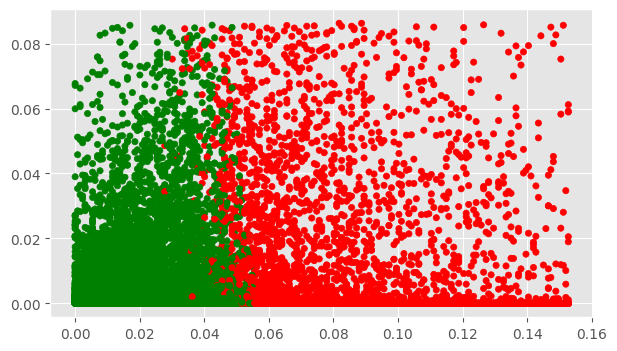

In [19]:
fig = plt.figure()
f1 = dataFrame['trxAtm'].values
f2 = dataFrame['trxBm'].values

#colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue']
asignar=[]
for row in cluster[1]:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
#plt.scatter(centroide[2][:, 0], centroide[2][:, 1], marker='*', c='yellow', s=100)
plt.show()

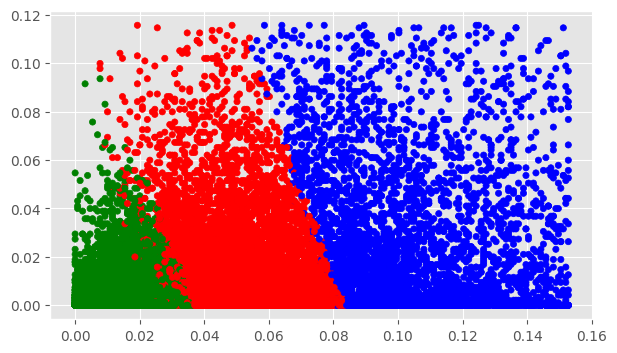

In [20]:
fig = plt.figure()
f1 = dataFrame['trxAtm'].values
f2 = dataFrame['trxPostd'].values

#colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue']
asignar=[]
for row in cluster[2]:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
#plt.scatter(centroide[2][:, 0], centroide[2][:, 1], marker='*', c='yellow', s=100)
plt.show()

#### 3.7 Evaluación

In [21]:
numClus = [3,4,5,6]

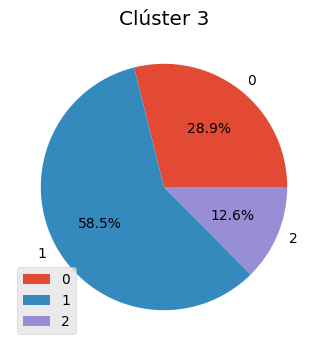

         ctdCliente  pctCliente
cluster                        
0              8946       28.90
1             18123       58.54
2              3891       12.57




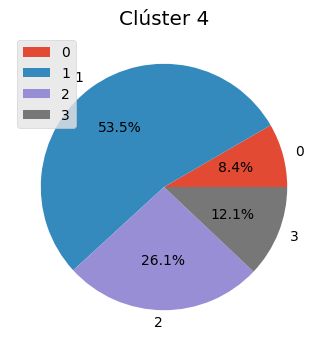

         ctdCliente  pctCliente
cluster                        
0              2588        8.36
1             16550       53.46
2              8089       26.13
3              3733       12.06




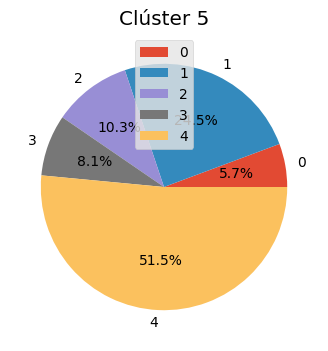

         ctdCliente  pctCliente
cluster                        
0              1758        5.68
1              7575       24.47
2              3186       10.29
3              2495        8.06
4             15946       51.51




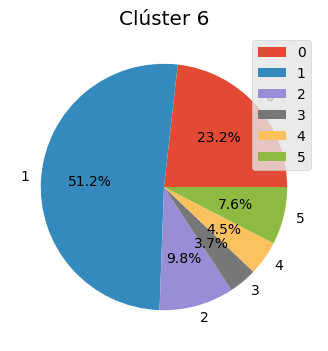

         ctdCliente  pctCliente
cluster                        
0              7190       23.22
1             15851       51.20
2              3034        9.80
3              1144        3.70
4              1399        4.52
5              2342        7.56




In [22]:
centroide = [kmeans[i].cluster_centers_ for i in range(len(kmeans))]
copy =  pd.DataFrame()

for i in numClus:
    # Distribución de los grupos por clúster:
    copy['cluster'] = cluster[i-1]
    cantidadGrupo =  pd.DataFrame()
    cantidadGrupo['ctdCliente']=copy.groupby('cluster').size()
    cantidadGrupo['pctCliente']=round(100*cantidadGrupo['ctdCliente']/cantidadGrupo['ctdCliente'].sum(),2)

    # gráfico de los grupos según su distribución:
    plt.pie(cantidadGrupo['pctCliente'], labels=cantidadGrupo.index, autopct='%1.1f%%')
    plt.title('Clúster '+str(i))
    plt.legend()
    plt.show()
    print(cantidadGrupo)
    print('\n')

El cluster 5 tiene mayor diversificacion y distribucion aceptable (el 6 tiene mayir diversificacion, pero su distribucion es mas pequeña por ejemplo). El  tambien podria ser aceptable, pero tiene menos diversificacion

In [23]:
numClusFinal = int(input('Ingrese el número de clúster: '))


Ingrese el número de clúster: 5


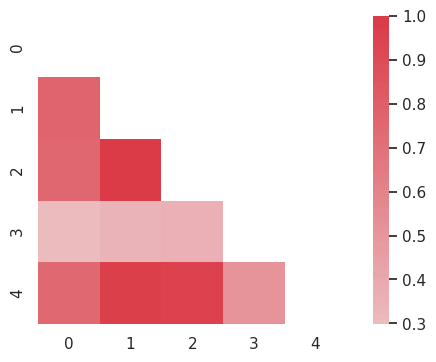

In [25]:
dfTransp = pd.DataFrame(centroide[numClusFinal-1],columns=channelName).T
corr = dfTransp.corr()

def plot_correlations(corr):
    sns.set(style="white")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,square=True)

Del cluester #5, el cluster 0 esta muy relacionando con el cluster 4, 3 y 1, asi como el 3 con el 4.

Productos pagados de Colab - Cancela los contratos aquí
  0 s
se ejecutó 7:03 p.m.

plot_correlations(corr)

Del cluester #5, el cluster 0 esta muy relacionando con el cluster 4, 3 y 1, asi como el 3 con el 4.